# TCS Historical Stock Data Analysis: 08/26/2004 - 06/23/2024

This notebook analyzes Tata Consultancy Services (TCS) stock data over a 20-year period, including EDA, visualization, and predictive analysis using historical data.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
file_path = '/kaggle/input/tcs-historical-data/TCS Historical Data.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and inspect column names
print(data.head())
print(data.columns)


         Date     Price      Open      High       Low   Vol. Change %
0  06/21/2024  3,810.75  3,827.00  3,877.80  3,798.05  4.64M    0.62%
1  06/20/2024  3,787.25  3,796.00  3,809.95  3,780.05  2.85M   -0.38%
2  06/19/2024  3,801.70  3,827.65  3,833.85  3,792.95  1.51M   -0.35%
3  06/18/2024  3,815.10  3,826.05  3,842.00  3,795.05  1.77M   -0.44%
4  06/14/2024  3,832.05  3,889.00  3,889.00  3,828.00  1.86M   -1.19%
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


# Data Cleaning

In [2]:
data['Vol.']


0        4.64M
1        2.85M
2        1.51M
3        1.77M
4        1.86M
         ...  
4912    19.94M
4913    21.19M
4914    24.47M
4915    30.65M
4916    40.44M
Name: Vol., Length: 4917, dtype: object

In [3]:
# Function to convert 'M' to 10^6 and 'K' to 10^3
def convert_million_or_thousand(x):
    if 'M' in x:
        return float(x.replace('M', '')) * 1000000
    elif 'K' in x:
        return float(x.replace('K', '')) * 1000
    return float(x)

# Apply the function to the 'Vol.' column
data['Vol.'] = data['Vol.'].apply(convert_million_or_thousand)

# Display the updated DataFrame
print(data)

            Date     Price      Open      High       Low        Vol. Change %
0     06/21/2024  3,810.75  3,827.00  3,877.80  3,798.05   4640000.0    0.62%
1     06/20/2024  3,787.25  3,796.00  3,809.95  3,780.05   2850000.0   -0.38%
2     06/19/2024  3,801.70  3,827.65  3,833.85  3,792.95   1510000.0   -0.35%
3     06/18/2024  3,815.10  3,826.05  3,842.00  3,795.05   1770000.0   -0.44%
4     06/14/2024  3,832.05  3,889.00  3,889.00  3,828.00   1860000.0   -1.19%
...          ...       ...       ...       ...       ...         ...      ...
4912  09/01/2004    119.22    119.47    120.07    118.70  19940000.0   -0.02%
4913  08/31/2004    119.24    119.05    119.47    117.78  21190000.0    0.13%
4914  08/30/2004    119.08    117.04    119.47    116.45  24470000.0    2.50%
4915  08/27/2004    116.17    118.55    118.55    115.67  30650000.0   -1.67%
4916  08/26/2004    118.14    119.71    120.31    117.69  40440000.0   -0.91%

[4917 rows x 7 columns]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


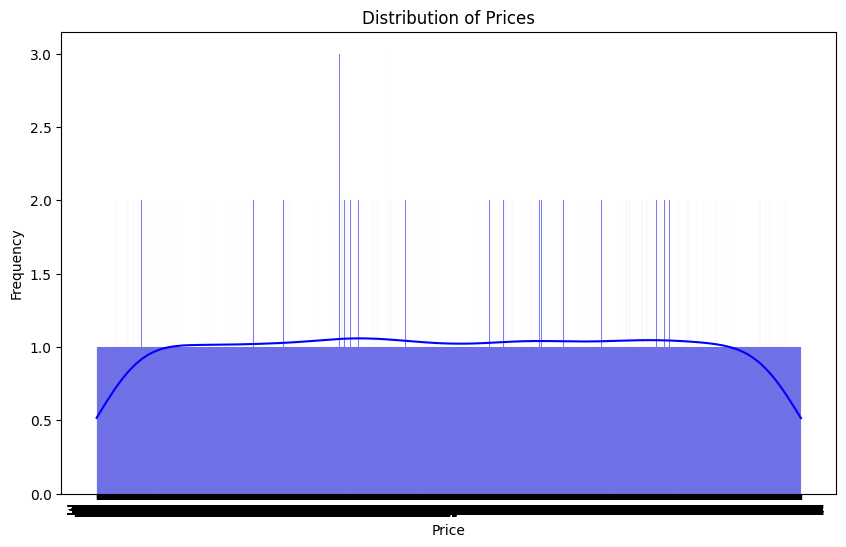

In [4]:
# Convert date column to datetime format if needed
data['Date'] = pd.to_datetime(data['Date'])

# Step 4: Exploratory Data Analysis (EDA)
# Example: Histogram of 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


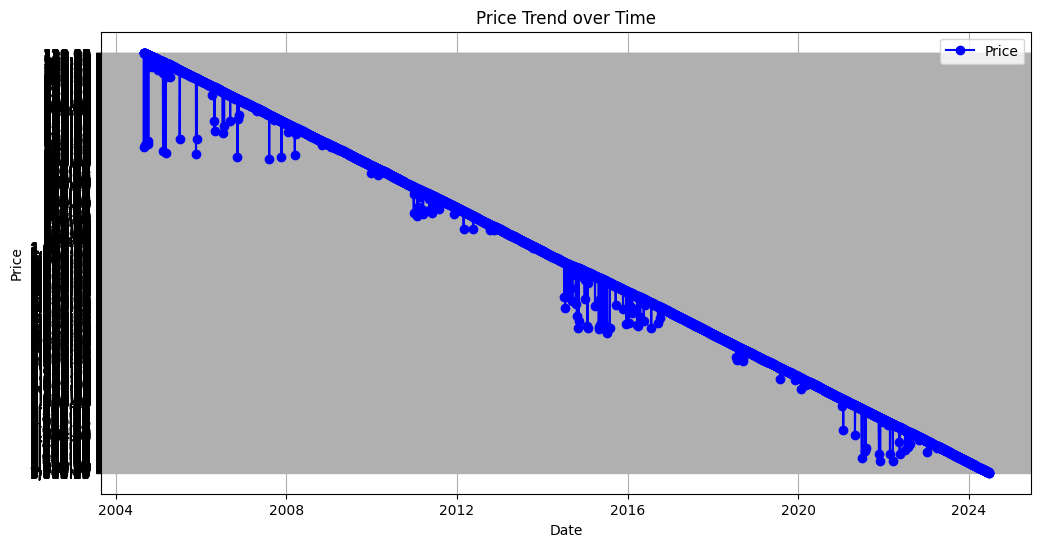

In [5]:
# Step 5: Data Visualization
# Example: Line plot of 'Price' over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], marker='o', linestyle='-', color='b', label='Price')
plt.title('Price Trend over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Step 6: Prediction Model (Example using Linear Regression)
# Assuming 'Price' as target variable and 'Open', 'High', 'Low', 'Vol.' as features
X = data[['Open', 'High', 'Low', 'Vol.']]
y = data['Price']

In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


ValueError: could not convert string to float: '3,180.50'

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [ ]:
# Step 8: Conclusion and Recommendations
# Summarize findings, model performance, and recommendations based on analysis
print("Summary:")
print("This notebook demonstrates EDA, visualization, and prediction based on historical data.")
print("The linear regression model predicts stock prices using 'Open', 'High', 'Low', and 'Vol.' features.")
print(f"Mean Squared Error of the model: {mse}")


# Seasonal Trend

In [ ]:
# Seasonal decomposition of 'Price' using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Price'], model='multiplicative', period=30)  # Adjust period as needed
result.plot()
plt.title('Seasonal Decomposition of Price')
plt.show()



# Moving Averages

In [ ]:
# Calculate and plot 30-day moving average of 'Price'
data['30_day_MA'] = data['Price'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Price')
plt.plot(data['Date'], data['30_day_MA'], label='30-day Moving Average', linestyle='--')
plt.title('Price with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Interactive Visualization (using Plotly)

In [ ]:
import plotly.express as px

fig = px.line(data, x='Date', y='Price', title='Interactive Price Trend over Time')
fig.show()


**To perform future predictions based on historical stock data, you can use time series forecasting techniques. One popular method for this purpose is using the ARIMA (AutoRegressive Integrated Moving Average) model, which is suitable for modeling time series data that exhibits temporal dependence.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Assuming 'data' DataFrame is already prepared with 'Date' and 'Price' columns
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


**Visualize the Time Series**

Before making predictions, it's essential to visualize the historical data to understand its patterns and trends.

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], marker='o', linestyle='-')
plt.title('Historical Stock Prices of TCS')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**Split Data into Training and Testing Sets**

Split the dataset into training and testing sets. Typically, you would use a portion of the data for training (e.g., 80%) and reserve the rest for testing (e.g., 20%).

In [ ]:
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]


**Build and Fit the ARIMA Model**

Build an ARIMA model using the training data and fit it to the historical stock prices.

In [ ]:
# Build the ARIMA model (p, d, q) = (3, 1, 2)
model = ARIMA(train_data['Price'], order=(3, 1, 2))
model_fit = model.fit()


**Make Predictions**
Use the fitted ARIMA model to make predictions on the test set and visualize the results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Build the ARIMA model (p, d, q) = (3, 1, 2) based on your analysis
model = ARIMA(train_data['Price'], order=(3, 1, 2))
model_fit = model.fit()

# Forecast future values
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame to store forecasted values
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Forecast'])

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'], label='Training Data')
plt.plot(test_data.index, test_data['Price'], label='Test Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--')
plt.title('ARIMA Forecasting of TCS Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Build the ARIMA model (p, d, q) = (3, 1, 2) based on your analysis
model = ARIMA(data['Price'], order=(3, 1, 2))
model_fit = model.fit()

# Forecast future values into 2025
forecast_steps = 12  # Adjust the number of steps as needed for monthly forecasts
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates for the forecast period (e.g., monthly intervals)
last_date = data.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]  # Start from the next month

# Create a DataFrame to store forecasted values
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--')
plt.title('ARIMA Forecasting of TCS Stock Prices into 2025')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values for 2025
print("Forecasted TCS Stock Prices for 2025:")
print(forecast_df)
